### Test inputs

In [774]:

inputs = [
    [7, 1],
    [11, 1],
    [11, 7],
    [9, 7],
    [9, 5],
    [2, 5],
    [2, 3],
    [7, 3],
]

inputs = [
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 2],
    [1, 2],
    [1, 3],
    [2, 3],
    [2, 2],
    [3, 2],
    [3, 1],
    [2, 1],
    [2, 0],
]
# # 
# inputs = [
#     [0, 0],
#     [0, 4],
#     [1, 4],
#     [1, 1],
#     [2, 1],
#     [2, 0],
#     [1, 0],
# ]

## Task 1

In [775]:
areas = []
print(inputs)

# Compute distances between all nodes
for i, val1 in enumerate(inputs):
    for j, val2 in enumerate(inputs):
        if j < i:
            areas += [(abs(val1[0] - val2[0]) + 1) * (abs(val1[1] - val2[1]) + 1)]

max(areas)

[[1, 0], [1, 1], [0, 1], [0, 2], [1, 2], [1, 3], [2, 3], [2, 2], [3, 2], [3, 1], [2, 1], [2, 0]]


9

## Task 2

In [776]:

import matplotlib.pyplot as plt
import numpy as np

def cross2d(v1,v2):
    return v1[0]*v2[1] - v1[1]*v2[0]

ab = cross2d(inputs[0], inputs[1])
bc = cross2d(inputs[1], inputs[2])

print(ab- bc)
# Moving counter clockwise so reverse the list
# As currently the code is built in a way that only works for clockwise movement
if (ab-bc >= 0):
    inputs = inputs[::-1]

inputs = np.array(inputs)
looped_inputs = np.r_[inputs, inputs]

0


In [777]:

min_x_id = np.where(inputs == min(inputs[:,0]))[0][0]

cur_point = inputs[min_x_id]
next_point = inputs[min_x_id+1]

print(cur_point, next_point)
if cur_point[1] > next_point[1]:
    print("je")




[2 0] [2 1]


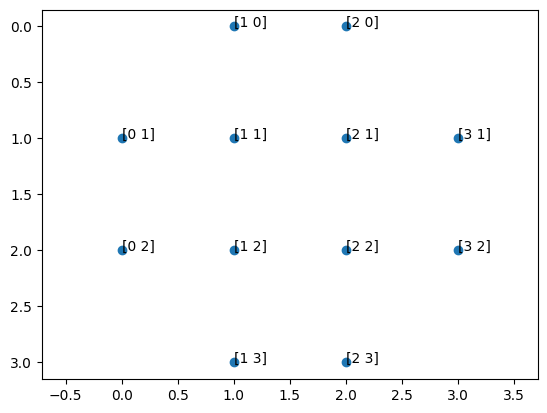

In [778]:


coords = np.array(inputs)
x = coords[:, 0]
y = coords[:, 1]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(coords):
    ax.annotate(txt, (x[i], y[i]))
ax.yaxis.set_inverted(True)
ax.axis("equal")
plt.show()


In [779]:
inputs

array([[2, 0],
       [2, 1],
       [3, 1],
       [3, 2],
       [2, 2],
       [2, 3],
       [1, 3],
       [1, 2],
       [0, 2],
       [0, 1],
       [1, 1],
       [1, 0]])

In [ ]:

print("\nloop starts:")
N_inputs = len(inputs)

max_area = 0
for i in range(N_inputs):
    prev_point = looped_inputs[i - 1]
    mid_point = looped_inputs[i]
    next_point = looped_inputs[i + 1]
    v1 = prev_point - mid_point
    v2 = next_point - mid_point
    cross_prod = cross2d(v1, v2)
    print(prev_point, mid_point, next_point)

    # print("loop", cross_prod)
    valid_points = []
    for j, coord in enumerate(inputs):
        # Point cannot be in same row or column
        if not np.array_equal(coord, mid_point):
            
            vec =  coord - mid_point 
            # dot1 = np.dot(v1, vec)
            # dot2 = np.dot(v2, vec)
            cros1 = cross2d(v1, vec)
            cros2 = cross2d(v2, vec)
            # print(coord, cross_prod, cros1, cros2)
            # print(cross_prod, dot1, dot2)
            
            # angle is convex and point is within the region
            if cross_prod < 0 and cros1*cros2 <= 0:
                valid_points += [coord]
                
            # angle is concave and point is within the region
            elif cross_prod > 0 and cros1*cros2 <= 0:
                valid_points += [coord]
                
            else:
                print(coord)
                continue
        
    print()
    for corner in valid_points:
        area = (abs(mid_point[0] - corner[0]) + 1) * (abs(mid_point[1] - corner[1]) + 1)
        # Points are in line so just compute area 
        for coord in valid_points:
            min_x = min(corner[0], mid_point[0])
            max_x = max(corner[0], mid_point[0])
            min_y = min(corner[1], mid_point[1])
            max_y = max(corner[1], mid_point[1])
            
            # Check if there is vertical line within the rectangle
            if (coord[0] > min_x and coord[0] < max_x):
                pos = np.argmin(np.sum((inputs - coord[None,:])**2, axis=-1))
                prev = looped_inputs[pos-1]
                next = looped_inputs[pos+1]
                if prev[0] == coord[0]:
                    bound = prev
                else:
                    bound = next 
                
                line_max_y = max(bound[1], coord[1])
                line_min_y = min(bound[1], coord[1])
                if line_max_y <= min_y or line_min_y >= max_y:
                    continue
                else:
                    area = 0
                    break
                
            # Check if there is horizontal line within the rectangle
            elif (coord[1] > min_y and coord[1] < max_y):
                pos = np.argmin(np.sum((inputs - coord[None,:])**2, axis=-1))
                prev = looped_inputs[pos-1]
                next = looped_inputs[pos+1]
                if prev[1] == coord[1]:
                    bound = prev
                else:
                    bound = next 
                line_max_x = max(bound[0], coord[0])
                line_min_x = min(bound[0], coord[0])
                
                if line_max_x <= min_x or line_min_x >= max_x:
                    continue
                else:
                    area = 0
                    break
            
        if area > max_area:
            max_area = area

print(max_area)


loop starts:
[1 0] [2 0] [2 1]
[2 1] -1 -1 0 -1
[3 1] -1 -1 -1 -1
[3 2] -2 -1 -1 -1
[2 2] -2 -1 0 -1
[2 3] -3 -1 0 -1
[1 3] -3 -1 1 -1
[1 3]
[1 2] -2 -1 1 -1
[1 2]
[0 2] -2 -1 2 -1
[0 2]
[0 1] -1 -1 2 -1
[0 1]
[1 1] -1 -1 1 -1
[1 1]
[1 0] 0 -1 1 -1
[1 0]

[2 0] [2 1] [3 1]
[2 0] 0 1 -1 1
[3 1] 1 1 0 1
[3 2] 1 1 1 1
[2 2] 0 1 1 1
[2 3] 0 1 2 1
[1 3] -1 1 2 1
[1 2] -1 1 1 1
[0 2] -2 1 1 1
[0 1] -2 1 0 1
[1 1] -1 1 0 1
[1 0] -1 1 -1 1
[1 0]

[2 1] [3 1] [3 2]
[2 0] 1 -1 1 -1
[2 0]
[2 1] 0 -1 1 -1
[2 1]
[3 2] -1 -1 0 -1
[2 2] -1 -1 1 -1
[2 2]
[2 3] -2 -1 1 -1
[2 3]
[1 3] -2 -1 2 -1
[1 3]
[1 2] -1 -1 2 -1
[1 2]
[0 2] -1 -1 3 -1
[0 2]
[0 1] 0 -1 3 -1
[0 1]
[1 1] 0 -1 2 -1
[1 1]
[1 0] 1 -1 2 -1
[1 0]

[3 1] [3 2] [2 2]
[2 0] -1 -1 2 -1
[2 0]
[2 1] -1 -1 1 -1
[2 1]
[3 1] 0 -1 1 -1
[3 1]
[2 2] -1 -1 0 -1
[2 3] -1 -1 -1 -1
[1 3] -2 -1 -1 -1
[1 2] -2 -1 0 -1
[0 2] -3 -1 0 -1
[0 1] -3 -1 1 -1
[0 1]
[1 1] -2 -1 1 -1
[1 1]
[1 0] -2 -1 2 -1
[1 0]

[3 2] [2 2] [2 3]
[2 0] -2 1 0 1
[2 1] -1 1 0 1
[3 1

In [781]:
pos = np.where((inputs == coord).all(axis=1))[0]

In [782]:
# mid, cor [0 2] [3, 1]
mid_point = np.array([0, 2])
corner = np.array([3, 1])
coord = np.array([2, 1])
# print(coord)
# print(np.array(inputs))
# print(inputs)


# print(x) 

In [783]:

np.concatenate((valid_points, [valid_points[0]]))

array([[2, 0],
       [2, 0]])

In [784]:

# with open("input") as f:
#     data = f.read().splitlines() 
    

# inputs = [[int(val) for val in row.split(",")] for row in data]
# inputs = np.array(inputs)

# ab = cross2d(inputs[0], inputs[1])
# bc = cross2d(inputs[1], inputs[2])

# # Moving counter clockwise so reverse the list
# # As currently the code is built in a way that only works for clockwise movement
# if (ab-bc > 0):
#     inputs = inputs[::-1]
    
# print(inputs[0])
# print(inputs[-1])